In [133]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import json
import matplotlib.ticker as mtick

sns.set(font_scale=1.1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
df_aggregated = []
for exp_name in glob.glob('data_server/*')[:]:
    model = '_'.join(exp_name.split('_')[2:-2])
    method = exp_name.split('_')[-2]
    n_pgd_steps = exp_name.split('_')[-1]

    # print(glob.glob(exp_name + '/*'))
    # print(model, method, n_pgd_steps)
    # ['epoch', 'train_loss', 'train_top1', 'train_robust_top1', 'train_eps', 'train_lr', 'train_latency', 'train_emissions', 
    #  'train_flops', 'train_cloud_computing_cost_lb', 'train_cloud_computing_cost_ub', 'train_electricity_cost', 'eval_loss', 'eval_top1', 'eval_robust_top1']
    df_summary = pd.read_csv(exp_name + '/summary.csv') 
    if df_summary['epoch'].max() == 99 and 'aa_results-best-8.0.json' in os.listdir(exp_name):  # if fully trained
        df_autoattack = pd.read_json(exp_name + '/aa_results-best-8.0.json', lines=True)  # ['top1', 'robust_top1']
        df_one_row = df_summary.loc[99:99].copy()
        df_one_row.loc[99, 'model'] = model
        df_one_row.loc[99, 'method'] = method
        df_one_row.loc[99, 'n_pgd_steps'] = n_pgd_steps
        df_one_row.loc[99, 'robust_top1'] = df_autoattack['robust_top1'][0]
        df_aggregated.append(df_one_row)
    
df = pd.concat(df_aggregated)
export_fname = 'data/aggregated_data.csv'
if os.path.exists(export_fname):
    os.remove(export_fname)
df.to_csv(export_fname)
df

,epoch,train_loss,train_top1,train_robust_top1,train_eps,train_lr,train_latency,train_emissions,train_flops,train_cloud_computing_cost_lb,train_cloud_computing_cost_ub,train_electricity_cost,eval_loss,eval_top1,eval_robust_top1,model,method,n_pgd_steps,robust_top1
99,99,0.647768,96.065559,88.857117,8,0.004,131991.750000,NaN,3160.764518,0.063063,0.214120,0.008342,0.486249,86.449997,55.520000,wide_resnet28_10,trades,5,48.59
99,99,0.559700,96.526657,90.888771,8,0.004,80262.078125,NaN,1975.348752,0.038347,0.130203,0.005073,0.451476,86.639999,57.209999,wide_resnet28_10,trades,2,46.40
99,99,0.560595,96.482361,90.703529,8,0.004,98799.203125,NaN,2508.197924,0.047204,0.160274,0.006244,0.448690,86.839996,57.480000,wide_resnet34_10,trades,2,45.95
99,99,0.648899,96.009178,88.500725,8,0.004,171244.390625,NaN,4013.374457,0.081817,0.277796,0.010823,0.483630,86.660004,56.380001,wide_resnet34_10,trades,5,49.11
99,99,0.349403,99.112030,86.090530,8,0.004,246815.109375,0.015840,6020.276501,0.117923,0.400389,0.015599,0.371825,88.269997,53.860001,wide_resnet34_10,pgd,10,49.45
99,99,0.889868,90.520294,80.358009,8,0.004,40617.886719,NaN,414.344416,0.019406,0.065891,0.002567,0.640484,83.389999,54.160000,resnet18_32,trades,7,46.03
99,99,0.074144,99.063705,98.687180,8,0.004,16934.496094,NaN,165.682842,0.008091,0.027472,0.001070,0.367906,90.080002,66.199997,resnet18_32,trades,1,0.40
99,99,0.349933,99.164383,86.142883,8,0.004,149467.921875,0.009356,3555.903107,0.071412,0.242470,0.009446,0.373252,88.540001,53.200001,wide_resnet28_10,pgd,7,49.14
99,99,0.038116,70.497742,98.846245,8,0.004,45390.433594,0.002809,1185.071574,0.021687,0.073633,0.002869,1.132794,69.919998,95.620003,wide_resnet28_10,pgd,1,0.00
99,99,0.635812,95.576271,74.617432,8,0.004,17908.982422,0.000763,165.682842,0.008557,0.029052,0.001132,0.417632,86.540001,54.520000,resnet18_32,pgd,2,43.74


In [158]:
df_summary

,epoch,train_loss,train_top1,train_robust_top1,train_eps,train_lr,train_latency,train_emissions,train_flops,train_cloud_computing_cost_lb,train_cloud_computing_cost_ub,train_electricity_cost,eval_loss,eval_top1,eval_robust_top1
0,0,2.391660,18.166077,18.065399,8,0.400,55669.714844,NaN,538.675203,0.026598,0.090309,0.003518,1.942591,27.490000,20.190001
1,1,2.003491,30.676144,29.808311,8,0.400,52014.335938,NaN,538.675203,0.024851,0.084379,0.003287,1.678927,40.610001,25.150000
2,2,1.888546,38.190639,35.869041,8,0.400,51695.640625,NaN,538.675203,0.024699,0.083862,0.003267,1.610296,43.599998,27.709999
3,3,1.820044,42.984859,40.369282,8,0.400,51799.859375,NaN,538.675203,0.024749,0.084031,0.003274,1.568058,44.880001,26.549999
4,4,1.752069,46.631363,43.220440,8,0.400,51791.363281,NaN,538.675203,0.024745,0.084017,0.003273,1.520628,47.709999,27.799999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.972464,88.297356,77.760551,8,0.040,51957.812500,NaN,538.675203,0.024824,0.084287,0.003284,0.725920,81.300003,52.930000
96,96,0.947257,88.478577,77.975998,8,0.040,52400.199219,NaN,538.675203,0.025036,0.085005,0.003312,0.701774,80.830002,51.439999
97,97,0.954072,88.549049,78.056541,8,0.040,51917.667969,NaN,538.675203,0.024805,0.084222,0.003281,0.701346,81.769997,52.349998
98,98,0.947848,88.883293,78.358566,8,0.040,52075.390625,NaN,538.675203,0.024880,0.084478,0.003291,0.715738,81.040001,51.299999


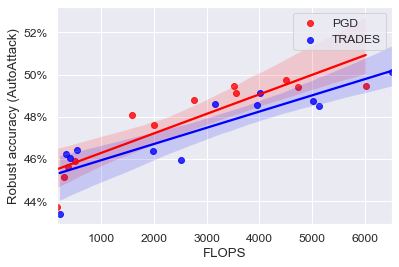

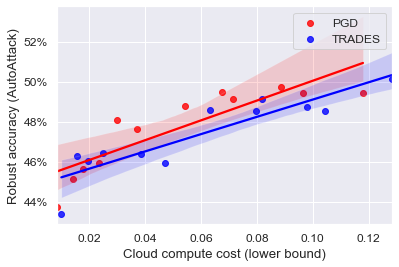

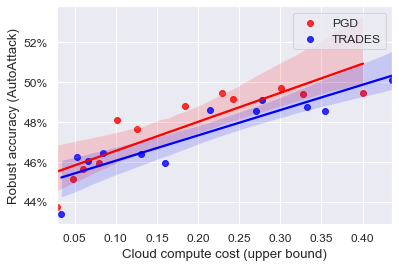

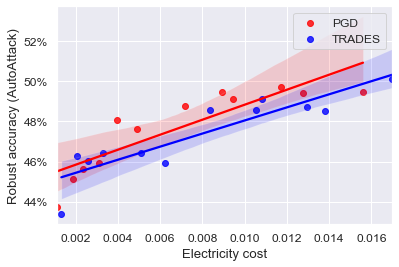

In [164]:
# 'train_emissions', 'train_flops', 'train_cloud_computing_cost_lb', 'train_cloud_computing_cost_ub', 'train_electricity_cost'
df = df[df['robust_top1'] > 10.0].copy()

for x_name_df, x_name_full in zip(
        ['train_flops', 'train_cloud_computing_cost_lb', 'train_cloud_computing_cost_ub', 'train_electricity_cost'],
        ['FLOPS', 'Cloud compute cost (lower bound)', 'Cloud compute cost (upper bound)', 'Electricity cost']
    ):
    ax = sns.regplot(x=x_name_df, y='robust_top1', color='red', data=df[df['method'] == 'pgd'], order=1, label='PGD')
    ax = sns.regplot(x=x_name_df, y='robust_top1', color='blue', data=df[df['method'] == 'trades'], order=1, label='TRADES')
    ax.set_xlabel(x_name_full)
    ax.set_ylabel('Robust accuracy (AutoAttack)')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
    ax.legend()
    plt.savefig("plots/plot_x={}_y=robust_acc.pdf".format(x_name_df), bbox_inches='tight')
    plt.show()